<a href="https://colab.research.google.com/github/d-val-r/CybersecurityResearchScripts/blob/master/charter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
from google.colab import files

In [3]:
file = files.upload()

Saving comparison.csv to comparison.csv


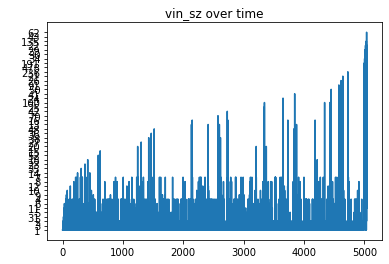

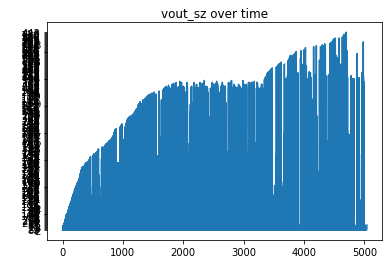

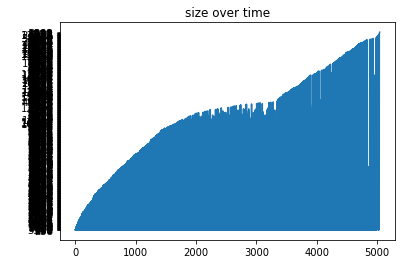

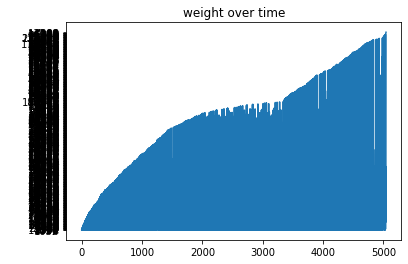

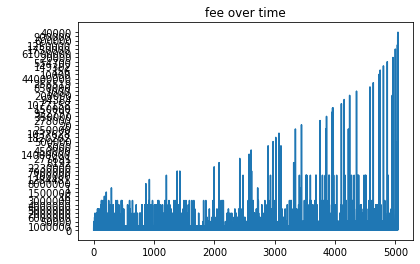

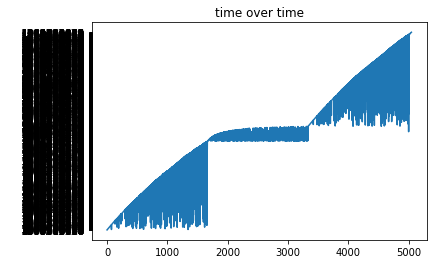

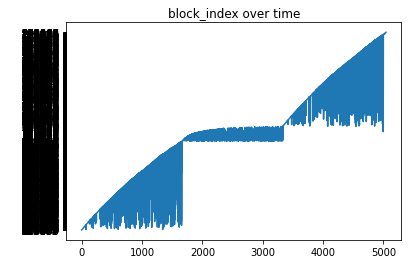

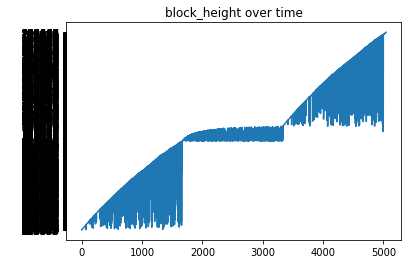

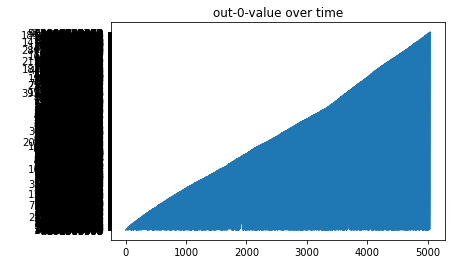

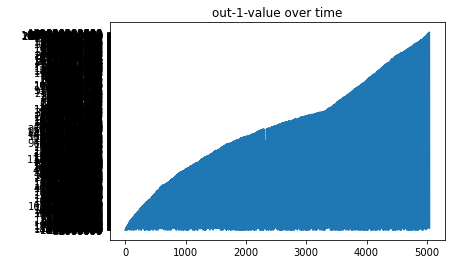

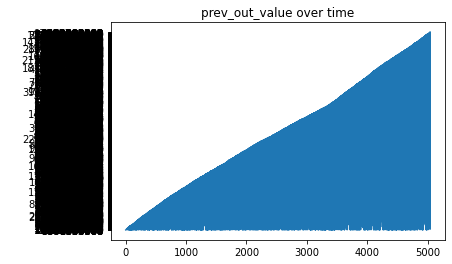

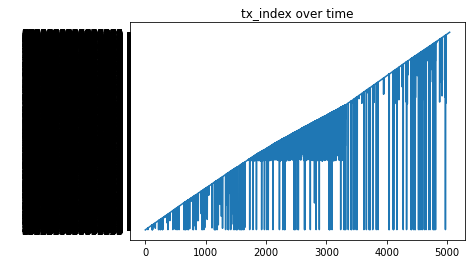

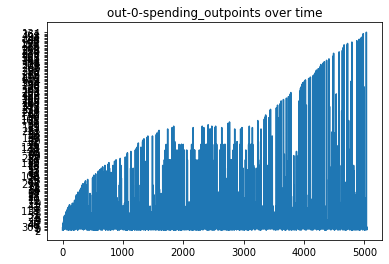

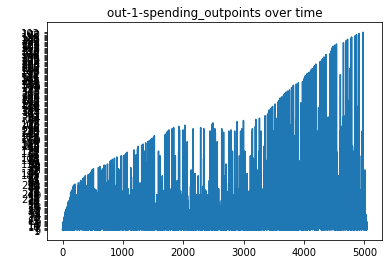

In [5]:
line_number = 0
x = []
y = []

# the values that will act as our dependent variable in the chart
# the lines of the CSV are arranged in this order
values = ["vin_sz","vout_sz","size","weight","fee","time","block_index","block_height","out-0-value","out-1-value","prev_out_value","tx_index","out-0-spending_outpoints","out-1-spending_outpoints"]

# convert the Google Colab representation of a file into a 
# list where each entry was a line from the file
lines = file['comparison.csv'].decode().split('\n')

# due to the way Google Colab formats the file object, there is a trailing 
# newline that becomes an empty entry in the lines list after the call
# to split; mitigate by reassigning the list to all but its last item
lines = lines[:len(lines)-1]

# loop through the list and extract the value in question from each line of the
# CSV and feed it into the x-values for the plot
for i in range(len(values)):
  for line in lines:
    current = line.split(',')
    y.append(current[i])
    x.append(line_number)
    line_number += 1
  
  # create the plot
  fig, ax = plt.subplots()
  ax.plot(x,y)
  ax.set_ylabel(" ")
  ax.set_title(f"{values[i]} over time")

  # reset axes and line_number
  x = []
  y = []
  line_number = 0

